# 在这里我们以手写字Mnist数据集为示例

### 导入数据集

In [ ]:
# 导入数据集
from keras.datasets import mnist

In [11]:
# keras的mnist数据即是以4维格式保存的
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [3]:
# 查看shape, 每个样本是28x28分辨率的灰度图
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

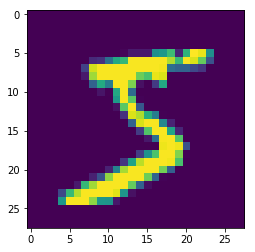

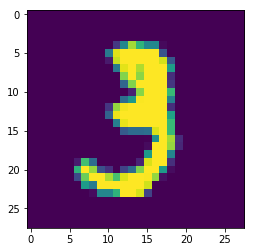

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# 查看一些图片
plt.imshow(train_data[0])
plt.show()
plt.imshow(train_data[10])
plt.show()

In [5]:
# 再查看一下label
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 建立我们的网络架构

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()  # Sequential()是keras框架的序列化模型，我们用此来建立模型实例

# Dense是keras的全连接网络(Fully Connect)，这里我我们建立了一个512个网络节点的隐藏层，且输入格式为28*28，刚好符合我们数据集的格式
# activation='relu': 使用relu激活函数
model.add(Dense(units=512, activation='relu', input_shape=(28*28, )))
# 输出层仍然是全连接层, 10个节点，代表10个类别
# activation='softmax', 表示激活函数为softmax，输出10个类别的概率
model.add(Dense(units=10, activation='softmax'))

In [9]:
# 模型建立完成后，我们还要预先编译compile我们的模型，才能够进行训练
# optimizer='rmsprop': 优化方法使用rmsprop方法
# loss='categorical_crossentropy': loss function为多类别对数损失函数，与softmax对应， 如果是二分类，激活函数sigmoid与binary_crossentropy对应
# metrics=['accuracy']: 训练过程总，监控的指标，这里我们使用准确度来作为监控指标
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### 数据预处理

In [12]:
# 数据归一化， 因为图片像素的范围[0, 255],并且reshape数据为一维合适，因为全连接网络输入为一维格式
# 原格式为uint8格式，需要先转换为浮点型
train_data = train_data.reshape((60000, 28*28))
train_data = train_data.astype('float32') / 255.

test_data = test_data.reshape((10000, 28*28))
test_data = test_data.astype('float32') / 255.

In [13]:
# oneHot-encoding
# 因为原target格式是一个数值的，而网络的输出是10个结果的
# 所以需要进行OneHot-Encoding
from keras.utils import to_categorical  

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### 进行训练

In [15]:
# 进行训练，并且返回训练的历史信息
history = model.fit(x=train_data, y=train_labels, batch_size=128, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.2561 - acc: 0.9266
Epoch 2/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.1040 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0682 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0501 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0368 - acc: 0.9891


#### 很快我们就训练完了，在训练集上的准确率达到了$98.91%$的准确率
#### 下面我们以绘图的形式，更直观的观察loss的变化和acc的变化

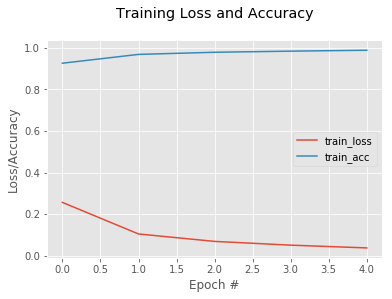

In [18]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 5), history.history['loss'], label='train_loss')
plt.plot(np.arange(0, 5), history.history['acc'], label='train_acc')
plt.title('Training Loss and Accuracy\n')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

### 模型评价，Evaluate

In [19]:
test_loss, test_acc = model.evaluate(x=test_data, y=test_labels, batch_size=128)
# 达到了97.82%的准确率
print('test_loss: ', test_loss)
print('test_acc: ', test_acc)

10000/10000 [==============================] - 0s 42us/step
test_loss:  0.07152597895297222
test_acc:  0.9783


In [ ]:
#